# Project 2: Sentiment Analysis From Audio Recordings (Classifiers)

--------------------------------------------------------------------------------

Group Members:  
**Abdul Moez** (F2020266109)  
**Ammara Malik** (F2020266540)  
**Syed Arsalan Askari Naqvi** (F2020266116)

--------------------------------------------------------------------------------

We will now be evaluating the performance of following classifiers:


*   Logistic Regression
*   K-Nearest Neighbors (kNN)
*   Naive Bayes
*   Support Vector Machines (SVM)

In [17]:
import pandas as pd
import os
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from glob import glob

import librosa
import librosa.display
import IPython.display as ipd

from itertools import cycle

import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [8]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [9]:
audio_recs = glob('/content/drive/MyDrive/Colab Notebooks/Datasets/AudioWAV/*.wav')
audio_recs

['/content/drive/MyDrive/Colab Notebooks/Datasets/AudioWAV/1079_TIE_SAD_XX.wav',
 '/content/drive/MyDrive/Colab Notebooks/Datasets/AudioWAV/1080_DFA_SAD_XX.wav',
 '/content/drive/MyDrive/Colab Notebooks/Datasets/AudioWAV/1079_WSI_SAD_XX.wav',
 '/content/drive/MyDrive/Colab Notebooks/Datasets/AudioWAV/1079_TIE_NEU_XX.wav',
 '/content/drive/MyDrive/Colab Notebooks/Datasets/AudioWAV/1079_TIE_ANG_XX.wav',
 '/content/drive/MyDrive/Colab Notebooks/Datasets/AudioWAV/1079_TIE_DIS_XX.wav',
 '/content/drive/MyDrive/Colab Notebooks/Datasets/AudioWAV/1079_TSI_DIS_XX.wav',
 '/content/drive/MyDrive/Colab Notebooks/Datasets/AudioWAV/1079_WSI_FEA_XX.wav',
 '/content/drive/MyDrive/Colab Notebooks/Datasets/AudioWAV/1080_DFA_FEA_XX.wav',
 '/content/drive/MyDrive/Colab Notebooks/Datasets/AudioWAV/1079_TSI_SAD_XX.wav',
 '/content/drive/MyDrive/Colab Notebooks/Datasets/AudioWAV/1079_TIE_FEA_XX.wav',
 '/content/drive/MyDrive/Colab Notebooks/Datasets/AudioWAV/1080_DFA_HAP_XX.wav',
 '/content/drive/MyDrive/Col

In [11]:
CREMA = '/content/drive/MyDrive/Colab Notebooks/Datasets/AudioWAV/'
crema_directory_list = os.listdir(CREMA)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(CREMA + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()

,Emotions,Path
0,sad,/content/drive/MyDrive/Colab Notebooks/Dataset...
1,sad,/content/drive/MyDrive/Colab Notebooks/Dataset...
2,sad,/content/drive/MyDrive/Colab Notebooks/Dataset...
3,neutral,/content/drive/MyDrive/Colab Notebooks/Dataset...
4,angry,/content/drive/MyDrive/Colab Notebooks/Dataset...


In [12]:
Crema_df.to_csv("CREMA-D.csv",index=False)
Crema_df

,Emotions,Path
0,sad,/content/drive/MyDrive/Colab Notebooks/Dataset...
1,sad,/content/drive/MyDrive/Colab Notebooks/Dataset...
2,sad,/content/drive/MyDrive/Colab Notebooks/Dataset...
3,neutral,/content/drive/MyDrive/Colab Notebooks/Dataset...
4,angry,/content/drive/MyDrive/Colab Notebooks/Dataset...
...,...,...
7437,sad,/content/drive/MyDrive/Colab Notebooks/Dataset...
7438,disgust,/content/drive/MyDrive/Colab Notebooks/Dataset...
7439,happy,/content/drive/MyDrive/Colab Notebooks/Dataset...
7440,fear,/content/drive/MyDrive/Colab Notebooks/Dataset...


**Logistic Regression**

In [15]:
# Function to extract features from audio files
def extract_features_logisticReg(file_path):
    # Load audio file
    audio, sr = librosa.load(file_path, sr=None)
    
    # Extract features
    features = []
    
    # Example feature extraction (MFCC)
    mfcc = librosa.feature.mfcc(y=audio, sr=sr)
    features.append(np.mean(mfcc))
    features.append(np.std(mfcc))
    
    return features

# Extract features and create feature matrix X
X = np.array([extract_features_logisticReg(file) for file in audio_recs])

# Create target variable y
y = (Crema_df.Emotions).to_numpy()

Accuracy:  0.32303559435862994


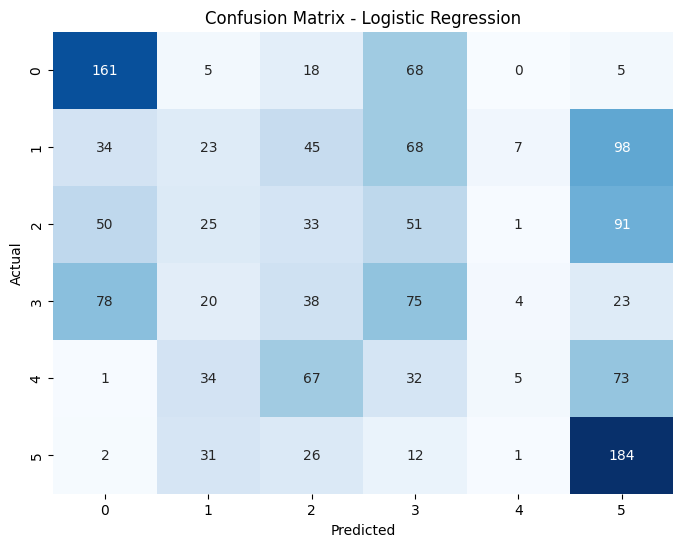

Classification Report - Logistic Regression:
              precision    recall  f1-score   support

       angry       0.49      0.63      0.55       257
     disgust       0.17      0.08      0.11       275
        fear       0.15      0.13      0.14       251
       happy       0.25      0.32      0.28       238
     neutral       0.28      0.02      0.04       212
         sad       0.39      0.72      0.50       256

    accuracy                           0.32      1489
   macro avg       0.29      0.32      0.27      1489
weighted avg       0.29      0.32      0.28      1489



In [22]:
# Create a feature scaler
scaler = StandardScaler()

# Scale the feature matrix X
X_scaled = scaler.fit_transform(X)

# Split the scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize logistic regression model
logistic_regression = LogisticRegression()

# Train the model
logistic_regression.fit(X_train, y_train)


# Predict labels for the test set
y_pred = logistic_regression.predict(X_test)

# Evaluate the model
accuracy = logistic_regression.score(X_test, y_test)
print("Accuracy: ", accuracy)

# Confusion matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred)

# Classification report for Logistic Regression
classification_report_lr = classification_report(y_test, y_pred, zero_division=1)

# Plot confusion matrix for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Print classification report for Logistic Regression
print("Classification Report - Logistic Regression:")
print(classification_report_lr)

**kNN**

In [23]:
def extract_features_knn(file_path):
    audio, sr = librosa.load(file_path, sr=None)
    
    features = []
    
    # Fourier Transform
    spectrum = np.abs(librosa.stft(audio))
    features.extend(np.mean(spectrum, axis=1))
    features.extend(np.std(spectrum, axis=1))
    
    # Mel-frequency cepstral coefficients (MFCCs)
    mfcc = librosa.feature.mfcc(y=audio, sr=sr)
    features.extend(np.mean(mfcc, axis=1))
    features.extend(np.std(mfcc, axis=1))
    
    # Melspectrogram
    melspectrogram = librosa.feature.melspectrogram(y=audio, sr=sr)
    features.extend(np.mean(melspectrogram, axis=1))
    features.extend(np.std(melspectrogram, axis=1))
    
    # Chromagram
    chromagram = librosa.feature.chroma_stft(y=audio, sr=sr)
    features.extend(np.mean(chromagram, axis=1))
    features.extend(np.std(chromagram, axis=1))
    
    # Spectral centroid
    centroid = librosa.feature.spectral_centroid(y=audio, sr=sr)
    features.append(np.mean(centroid))
    
    # Spectral bandwidth
    bandwidth = librosa.feature.spectral_bandwidth(y=audio, sr=sr)
    features.append(np.max(bandwidth) - np.min(bandwidth))
    
    # Spectral contrast
    contrast = librosa.feature.spectral_contrast(y=audio, sr=sr)
    features.append(np.mean(contrast))
    
    return features


# Extract features and create feature matrix X
X = np.array([extract_features_knn(file) for file in audio_recs])

# Create target variable y
y = (Crema_df.Emotions).to_numpy()

/usr/local/lib/python3.10/dist-packages/librosa/core/pitch.py:102: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


In [24]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn.fit(X_train, y_train)

# Predict labels for the test set
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.3337810611148422


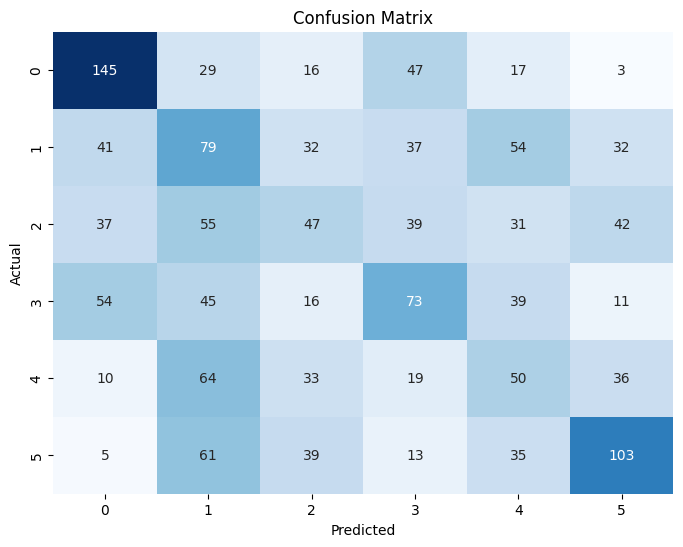

Classification Report:
              precision    recall  f1-score   support

       angry       0.50      0.56      0.53       257
     disgust       0.24      0.29      0.26       275
        fear       0.26      0.19      0.22       251
       happy       0.32      0.31      0.31       238
     neutral       0.22      0.24      0.23       212
         sad       0.45      0.40      0.43       256

    accuracy                           0.33      1489
   macro avg       0.33      0.33      0.33      1489
weighted avg       0.33      0.33      0.33      1489



In [25]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification report
classification_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_report)

**Naive Bayes**

In [26]:
# Using the same Training/Testing data From KNN
# Initialize Naive Bayes classifier
nb = GaussianNB()

# Train the classifier
nb.fit(X_train, y_train)

# Predict labels for the test set
y_pred = nb.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.32572196104768303


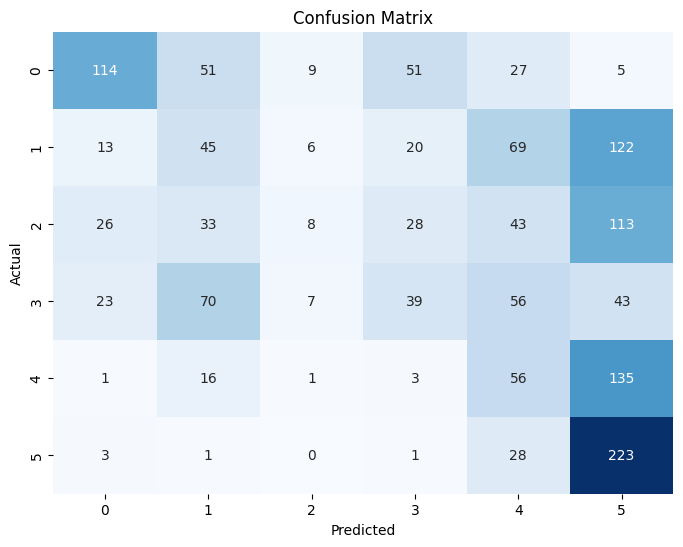

Classification Report:
              precision    recall  f1-score   support

       angry       0.63      0.44      0.52       257
     disgust       0.21      0.16      0.18       275
        fear       0.26      0.03      0.06       251
       happy       0.27      0.16      0.21       238
     neutral       0.20      0.26      0.23       212
         sad       0.35      0.87      0.50       256

    accuracy                           0.33      1489
   macro avg       0.32      0.32      0.28      1489
weighted avg       0.32      0.33      0.28      1489



In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

**SVM**

In [28]:
from sklearn.svm import SVC

svm = SVC()

# Train the classifier
svm.fit(X_train, y_train)

# Predict labels for the test set
y_pred = svm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.3707186030893217


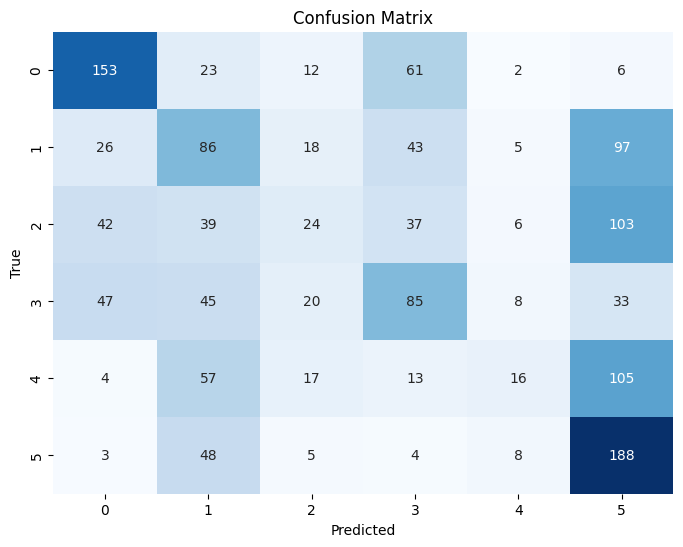

Classification Report:
              precision    recall  f1-score   support

       angry       0.56      0.60      0.58       257
     disgust       0.29      0.31      0.30       275
        fear       0.25      0.10      0.14       251
       happy       0.35      0.36      0.35       238
     neutral       0.36      0.08      0.12       212
         sad       0.35      0.73      0.48       256

    accuracy                           0.37      1489
   macro avg       0.36      0.36      0.33      1489
weighted avg       0.36      0.37      0.33      1489



In [29]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create classification report
report = classification_report(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Print classification report
print("Classification Report:")
print(report)